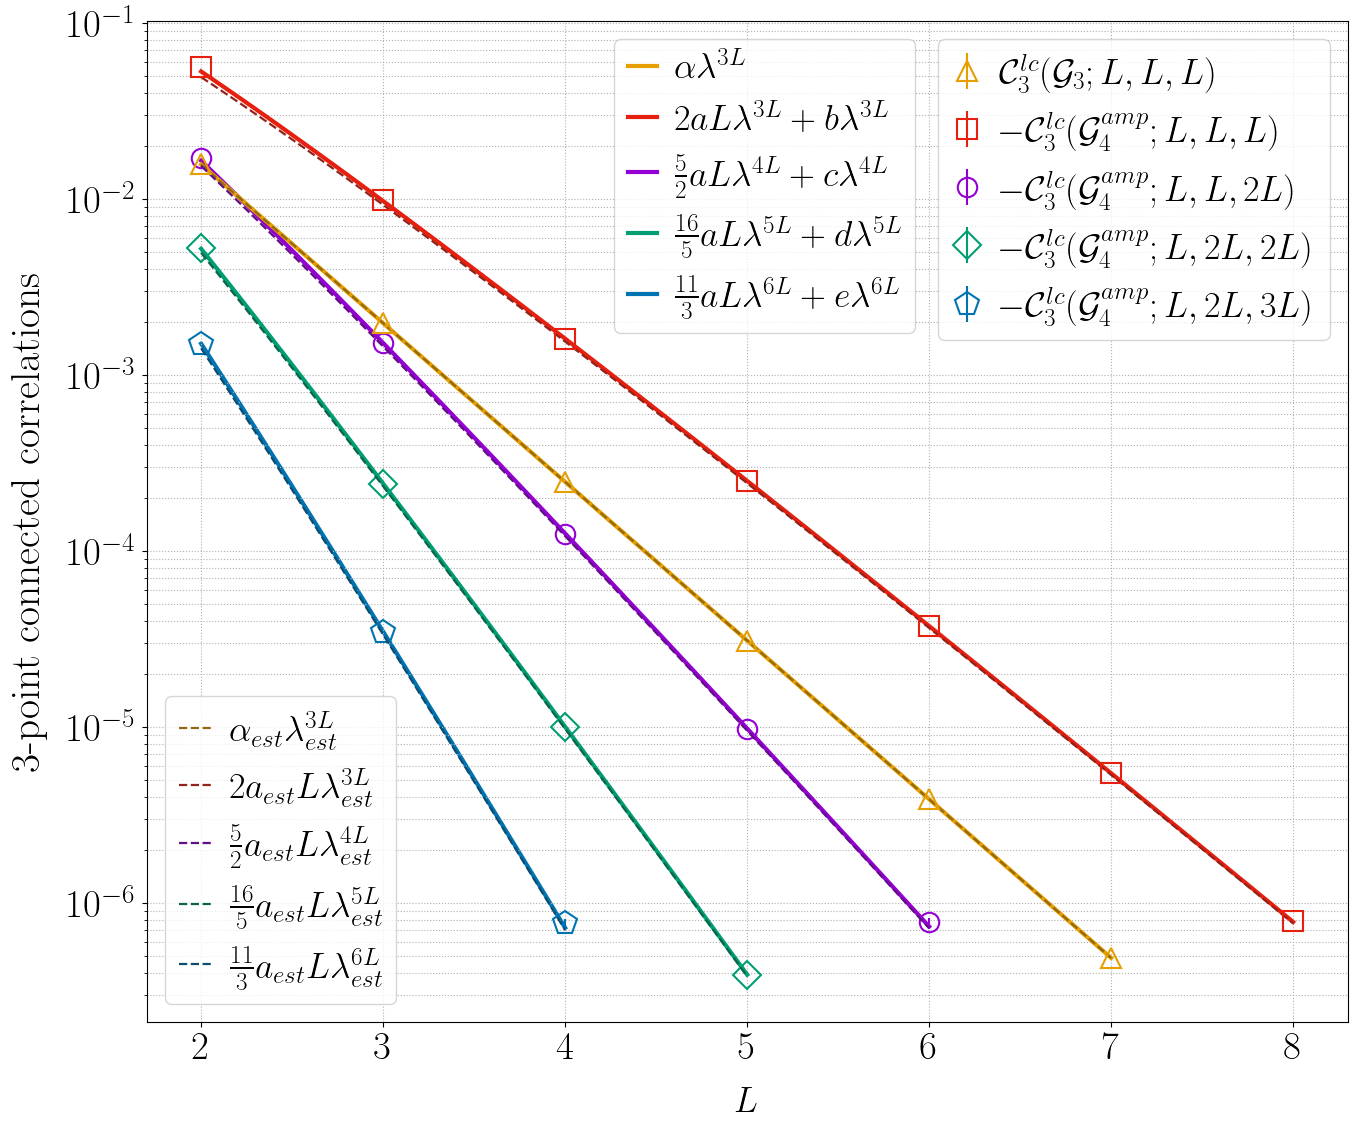

DOF: 14
α: 1.00152099 +/- 0.00016171
λ: 0.50050524 +/- 0.00000798
a: 0.78443093 +/- 0.00217127
b: 0.24408732 +/- 0.01819829
c: 0.27942124 +/- 0.01682583
d: 0.27806409 +/- 0.02244350
e: 0.35884416 +/- 0.01634533
Chi-squared: 14.118568695852723
Reduced chi-squared: 1.0084691925609088
P-value: 0.440915451185391


In [2]:
import numpy as np
import scipy.optimize as optimization
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Set Matplotlib fonts with LaTeX
rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 26})  # Change font size


# Function definitions
def f(x, alpha, lambda_val):
    return alpha * lambda_val**(3. * x)


def g(x, a, b, lambda_val):
    return 2 * x * a * lambda_val**(3. * x) + b * lambda_val**(3. * x)


def h(x, a, c, lambda_val):
    return x * 5. / 2. * a * lambda_val**(4. * x) + c * lambda_val**(4. * x)


def k(x, a, d, lambda_val):
    return x * 16. / 5. * a * lambda_val**(5. * x) + d * lambda_val**(5. * x)


def p(x, a, e, lambda_val): 
    return x * 11. / 3. * a * lambda_val**(6. * x) + e * lambda_val**(6. * x)


def m(x, alpha, lambda_val, a, b, c, d, e):
    idx_f = len(fdata)
    idx_g = idx_f + len(gdata)
    idx_h = idx_g + len(hdata)
    idx_k = idx_h + len(kdata)
    idx_p = idx_k + len(pdata)
    
    xfdata = x[:idx_f]
    xgdata = x[idx_f:idx_g]
    xhdata = x[idx_g:idx_h]
    xkdata = x[idx_h:idx_k]
    xpdata = x[idx_k:idx_p]


    fr = f(xfdata, alpha, lambda_val)
    gr = g(xgdata, a, b, lambda_val)
    hr = h(xhdata, a, c, lambda_val)
    kr = k(xkdata, a, d, lambda_val)
    pr = p(xpdata, a, e, lambda_val)
    
    mr = np.hstack((fr, gr, hr, kr, pr))
    return mr


# Paths to data files inside analysis_dir
file_path_bare = f"../analisi_dati_3point/SG_barevertex_media.dat"
file_path_loop_LLL = f"../analisi_dati_3point/SG_vertexLLL_media.dat"
file_path_loop_LL2L = f"../analisi_dati_3point/SG_vertexLL2L_media.dat"
file_path_loop_L2L2L = f"../analisi_dati_3point/SG_vertexL2L2L_media.dat"
file_path_loop_L2L3L = f"../analisi_dati_3point/SG_vertexL2L3L_media.dat"

# Read .dat files using pandas
data_bare = pd.read_csv(file_path_bare, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_LLL = pd.read_csv(file_path_loop_LLL, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_LL2L = pd.read_csv(file_path_loop_LL2L, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_L2L2L = pd.read_csv(file_path_loop_L2L2L, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])
data_loop_L2L3L = pd.read_csv(file_path_loop_L2L3L, sep='\s+', comment='#', usecols=[0, 1, 2], header=None, names=['L', 'corr', 'err'])


# Filter data
frangeA, frangeB = 2, 7
f_inf, f_sup = 2, 7
data_bare_filtered = data_bare[data_bare['L'].isin(np.arange(frangeA, frangeB + 1))]
data_bare_non_filtered = data_bare[data_bare['L'].isin(np.arange(f_inf, f_sup + 1))]
xfdata = data_bare_filtered['L'].values
fdata = data_bare_filtered['corr'].values
fdata_err = data_bare_filtered['err'].values


grangeA, grangeB = 4, 8
g_inf, g_sup = 2, 8
data_loop_LLL_filtered = data_loop_LLL[data_loop_LLL['L'].isin(np.arange(grangeA, grangeB + 1))]
data_loop_LLL_non_filtered = data_loop_LLL[data_loop_LLL['L'].isin(np.arange(g_inf, g_sup + 1))]
xgdata = data_loop_LLL_filtered['L'].values
gdata = data_loop_LLL_filtered['corr'].values
gdata_err = data_loop_LLL_filtered['err'].values


hrangeA, hrangeB = 3, 6
h_inf, h_sup = 2, 6
data_loop_LL2L_filtered = data_loop_LL2L[data_loop_LL2L['L'].isin(np.arange(hrangeA, hrangeB + 1))]
data_loop_LL2L_non_filtered = data_loop_LL2L[data_loop_LL2L['L'].isin(np.arange(h_inf, h_sup + 1))]
xhdata = data_loop_LL2L_filtered['L'].values
hdata = data_loop_LL2L_filtered['corr'].values
hdata_err = data_loop_LL2L_filtered['err'].values


krangeA, krangeB = 3, 5
k_inf, k_sup = 2, 5
data_loop_L2L2L_filtered = data_loop_L2L2L[data_loop_L2L2L['L'].isin(np.arange(krangeA, krangeB + 1))]
data_loop_L2L2L_non_filtered = data_loop_L2L2L[data_loop_L2L2L['L'].isin(np.arange(k_inf, k_sup + 1))]
xkdata = data_loop_L2L2L_filtered['L'].values
kdata = data_loop_L2L2L_filtered['corr'].values
kdata_err = data_loop_L2L2L_filtered['err'].values


prangeA, prangeB = 2, 4
p_inf, p_sup = 2, 4
data_loop_L2L3L_filtered = data_loop_L2L3L[data_loop_L2L3L['L'].isin(np.arange(prangeA, prangeB + 1))]
data_loop_L2L3L_non_filtered = data_loop_L2L3L[data_loop_L2L3L['L'].isin(np.arange(p_inf, p_sup + 1))]
xpdata = data_loop_L2L3L_filtered['L'].values
pdata = data_loop_L2L3L_filtered['corr'].values
pdata_err = data_loop_L2L3L_filtered['err'].values


# Concatenate all data
mdata = np.hstack((fdata, gdata, hdata, kdata, pdata))
mdata_err = np.hstack((fdata_err, gdata_err, hdata_err, kdata_err, pdata_err))
xdata_new = np.hstack((xfdata, xgdata, xhdata, xkdata, xpdata))


# Fit the curve
popt, pcov = optimization.curve_fit(f=m, xdata=xdata_new, ydata=mdata, sigma=mdata_err, absolute_sigma=True, p0=[1, 0.5, 0.78, 0.1, 0.1, 0.1, 0.1])


# Calculate fitted function values
xf_fit = np.linspace(f_inf, f_sup, 100)
xg_fit = np.linspace(g_inf, g_sup, 100)
xh_fit = np.linspace(h_inf, h_sup, 100)
xk_fit = np.linspace(k_inf, k_sup, 100)
xp_fit = np.linspace(p_inf, p_sup, 100)


f_fit = f(xf_fit, popt[0], popt[1])
g_fit = g(xg_fit, popt[2], popt[3], popt[1])
h_fit = h(xh_fit, popt[2], popt[4], popt[1])
k_fit = k(xk_fit, popt[2], popt[5], popt[1])
p_fit = p(xp_fit, popt[2], popt[6], popt[1])


# Plot data and fitted functions
fig, ax = plt.subplots(figsize=(15.5, 13))


# Parameters provided for the new curves
a_val = 0.78496
alpha_val = 1.001534
lambda_val = 0.5004937


# New curves to add
def curva1(x, a, lambda_val):
    return 2 * a * x * lambda_val**(3 * x)


def curva2(x, a, lambda_val):
    return 5 / 2 * a * x * lambda_val**(4 * x)


def curva3(x, a, lambda_val):
    return 16 / 5 * a * x * lambda_val**(5 * x)


def curva4(x, a, lambda_val):
    return 11 / 3 * a * x * lambda_val**(6 * x)


def curva5(x, alpha_val, lambda_val):
    return alpha_val * lambda_val**(3 * x)


# Generate data for new curves
x_curva1 = np.linspace(g_inf, g_sup, 100)
x_curva2 = np.linspace(h_inf, h_sup, 100)
x_curva3 = np.linspace(k_inf, k_sup, 100)
x_curva4 = np.linspace(p_inf, p_sup, 100)
x_curva5 = np.linspace(f_inf, f_sup, 100)


curva1_fit = curva1(x_curva1, a_val, lambda_val)
curva2_fit = curva2(x_curva2, a_val, lambda_val)
curva3_fit = curva3(x_curva3, a_val, lambda_val)
curva4_fit = curva4(x_curva4, a_val, lambda_val)
curva5_fit = curva5(x_curva5, alpha_val, lambda_val)


# Plot data and fitted functions
ax.errorbar(data_bare_non_filtered['L'].values, data_bare_non_filtered['corr'].values, yerr=data_bare_non_filtered['err'].values, fmt='^', markeredgewidth=1.5, markerfacecolor='none', markersize=14, label='$\\mathcal{C}_{3}^{lc}(\\mathcal{G}_3;L,L,L)$', color='#e69e00', zorder=10)
ax.plot(xf_fit, f_fit, label=r'$\alpha \lambda^{3L}$', color='#e69e00', zorder=6, linewidth=3)


ax.errorbar(data_loop_LLL_non_filtered['L'].values, data_loop_LLL_non_filtered['corr'].values, yerr=data_loop_LLL_non_filtered['err'].values, fmt='s', markeredgewidth=1.5,  markerfacecolor='none', markersize=14, label='$-\\mathcal{C}_{3}^{lc}(\\mathcal{G}_4^{amp};L,L,L)$', color='#e61f0f', zorder=8)
ax.plot(xg_fit, g_fit, label=r'$2 a L \lambda^{3L} + b \lambda^{3L}$', color='#e61f0f', zorder=7, linewidth=3)


ax.errorbar(data_loop_LL2L_non_filtered['L'].values, data_loop_LL2L_non_filtered['corr'].values, yerr=data_loop_LL2L_non_filtered['err'].values, fmt='o', markeredgewidth=1.5, markerfacecolor='none', markersize=14, label='$-\\mathcal{C}_{3}^{lc}(\\mathcal{G}_4^{amp};L,L,2L)$', color='#9400d4', zorder=6)
ax.plot(xh_fit, h_fit, label=r'$\frac{5}{2} a L \lambda^{4L} + c \lambda^{4L}$', color='#9400d4', zorder=5, linewidth=3)


ax.errorbar(data_loop_L2L2L_non_filtered['L'].values, data_loop_L2L2L_non_filtered['corr'].values, yerr=data_loop_L2L2L_non_filtered['err'].values, fmt='D', markeredgewidth=1.5, markerfacecolor='none', markersize=14, label='$-\\mathcal{C}_{3}^{lc}(\\mathcal{G}_4^{amp};L,2L,2L)$', color='#009e73', zorder=4)
ax.plot(xk_fit, k_fit, label=r'$\frac{16}{5} a L \lambda^{5L} + d \lambda^{5L}$', color='#009e73', zorder=3, linewidth=3)


ax.errorbar(data_loop_L2L3L_non_filtered['L'].values, data_loop_L2L3L_non_filtered['corr'].values, yerr=data_loop_L2L3L_non_filtered['err'].values, fmt='p', markeredgewidth=1.5, markerfacecolor='none', markersize=18, label='$-\\mathcal{C}_{3}^{lc}(\\mathcal{G}_4^{amp};L,2L,3L)$', color='#0073b2', zorder=2)
ax.plot(xp_fit, p_fit, label=r'$\frac{11}{3} a L \lambda^{6L} + e \lambda^{6L}$', color='#0073b2', zorder=1, linewidth=3)


# Plot new curves superimposed
ax.plot(x_curva5, curva5_fit, label=r'$\alpha_{est} \lambda_{est}^{3L}$', color='#916910', linestyle='--', zorder=7, linewidth=1.6)
ax.plot(x_curva1, curva1_fit, label=r'$2 a_{est} L \lambda_{est}^{3L}$', color='#92231a', linestyle='--', zorder=8, linewidth=1.6)
ax.plot(x_curva2, curva2_fit, label=r'$\frac{5}{2} a_{est} L \lambda_{est}^{4L}$', color='#620f86', linestyle='--', zorder=9, linewidth=1.6)
ax.plot(x_curva3, curva3_fit, label=r'$\frac{16}{5} a_{est} L \lambda_{est}^{5L}$', color='#0b644b', linestyle='--', zorder=10, linewidth=1.6)
ax.plot(x_curva4, curva4_fit, label=r'$\frac{11}{3} a_{est} L \lambda_{est}^{6L}$', color='#0c4d70', linestyle='--', zorder=11, linewidth=1.6)


ax.set_yscale('log')
ax.set_xlabel('$L$', labelpad=15)  # Increase distance of the title from the axis
plt.rcParams['font.family'] = 'CMU Serif'
ax.set_ylabel('3-point connected correlations', labelpad=15,fontsize=30)  # Increase distance of the title from the axis


# Add ticks for every integer value, including 2
ax.set_xticks(np.arange(2, max(xdata_new) + 1, 1))


# Create the two separate legends
handles, labels = ax.get_legend_handles_labels()


# Legend for data (placed at top right, shifted slightly left for space for legend2)
legend1 = ax.legend(handles[:5], labels[:5], loc='upper right', fontsize=26, bbox_to_anchor=(0.655, 1), handletextpad=0.5, handlelength=0.8)


# Legend for functions (placed at bottom left)
legend2 = ax.legend(handles[5:10], labels[5:10], loc='lower left', fontsize=26, bbox_to_anchor=(0, 0), handletextpad=0.5, handlelength=0.9)


# Legend for functions (placed at top right)
legend3 = ax.legend(handles[10:], labels[10:], loc='upper right', fontsize=26, bbox_to_anchor=(1., 1), handletextpad=0.5, handlelength=0.8)


plt.xticks(fontsize=28)  # Change the font size of numbers on the x-axis
plt.yticks(fontsize=28)  # Change the font size of numbers on the y-axis


# Add the first legend to the axes to make it visible together with the second
ax.add_artist(legend1)
ax.add_artist(legend2)


# Set grid with a lower zorder than markers
ax.grid(True, zorder=0)
plt.grid(True, which="both", ls="dotted", linewidth=0.8)


plt.savefig('joint_fit_3point.pdf', format='pdf', dpi=300)
plt.show()


# Calculate residuals
residuals = mdata - m(xdata_new, *popt)


# Calculate reduced chi-square
chi_squared = np.sum((residuals / mdata_err)**2)
dof = len(mdata) - len(popt)  # degrees of freedom
print(f"DOF: {dof}")
reduced_chi_squared = chi_squared / dof


# compute p-value
p_value = 1 - stats.chi2.cdf(chi_squared, dof)


# unpack the results
fit_α, fit_λ, fit_a, fit_b, fit_c, fit_d, fit_e = popt
fit_sα, fit_sλ, fit_sa, fit_sb, fit_sc, fit_sd, fit_se = np.sqrt(np.diag(pcov))


# print the fit results:
print("α: %.8f +/- %.8f" % (fit_α, fit_sα))
print("λ: %.8f +/- %.8f" % (fit_λ, fit_sλ))
print("a: %.8f +/- %.8f" % (fit_a, fit_sa))
print("b: %.8f +/- %.8f" % (fit_b, fit_sb))
print("c: %.8f +/- %.8f" % (fit_c, fit_sc))
print("d: %.8f +/- %.8f" % (fit_d, fit_sd))
print("e: %.8f +/- %.8f" % (fit_e, fit_se))


print(f"Chi-squared: {chi_squared}")
print(f"Reduced chi-squared: {reduced_chi_squared}")
print(f"P-value: {p_value}")
